In [1]:
import sys, os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
sys.path.append(os.path.abspath(os.path.join('../../../BayesFlow')))

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle

import tensorflow as tf

In [2]:
from bayesflow import benchmarks
from bayesflow.amortizers import AmortizedPosterior, AmortizedLikelihood, AmortizedPosteriorLikelihood
from bayesflow.networks import InvertibleNetwork
from bayesflow.trainers import Trainer
from bayesflow.diagnostics import plot_sbc_ecdf, plot_recovery, plot_posterior_2d, plot_losses, plot_latent_space_2d

/home/jupyter/BayesFlow/bayesflow/trainers.py:26: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


# Benchmark: Gaussian Linear

In [3]:
benchmark_name = 'gaussian_linear'
benchmark = benchmarks.Benchmark(benchmark_name)

INFO:root:Performing 2 pilot runs with the gaussian_linear model...
INFO:root:Shape of parameter batch after 2 pilot simulations: (batch_size = 2, 10)
INFO:root:Shape of simulation batch after 2 pilot simulations: (batch_size = 2, 10)
INFO:root:No optional prior non-batchable context provided.
INFO:root:No optional prior batchable context provided.
INFO:root:No optional simulation non-batchable context provided.
INFO:root:No optional simulation batchable context provided.


# Amortizer and Trainer

In [4]:
coupling_settings = {'dense_args': dict(units=32, activation='relu'), 'dropout_prob': 0.05}
amortizer = AmortizedPosteriorLikelihood(
    AmortizedPosterior(InvertibleNetwork(num_params=10, num_coupling_layers=5, coupling_settings=coupling_settings)),
    AmortizedLikelihood(InvertibleNetwork(num_params=10, num_coupling_layers=5, coupling_settings=coupling_settings))
)

# Training

In [5]:
trainer = Trainer(
    amortizer=amortizer,
    default_lr=1e-3,
    generative_model=benchmark.generative_model,
    configurator=benchmark.configurator,
    checkpoint_path=f'checkpoints/{benchmark_name}',
    max_to_keep=1,
    memory=False
)

INFO:root:Initialized empty loss history.
INFO:root:Initialized networks from scratch.
INFO:root:Performing a consistency check with provided components...
INFO:root:Done.


# Training
Uncomment for training. Wall time with GPU: approx. 6min 16s

In [7]:
EPOCHS = 50
SIMULATION_BUDGET = 10000
N_VAL = 300
BATCH_SIZE = 64
train_data = trainer.generative_model(SIMULATION_BUDGET)

In [8]:
%%time
h = trainer.train_offline(train_data, EPOCHS, BATCH_SIZE, validation_sims=N_VAL)

INFO:root:Generated 300 simulations for validation.


Training epoch 1:   0%|          | 0/157 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 1, Post.Loss: -11.674, Lik.Loss: -7.785


Training epoch 2:   0%|          | 0/157 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 2, Post.Loss: -11.926, Lik.Loss: -8.539


Training epoch 3:   0%|          | 0/157 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 3, Post.Loss: -12.032, Lik.Loss: -8.621


Training epoch 4:   0%|          | 0/157 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 4, Post.Loss: -12.053, Lik.Loss: -8.633


Training epoch 5:   0%|          | 0/157 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 5, Post.Loss: -12.006, Lik.Loss: -8.674


Training epoch 6:   0%|          | 0/157 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 6, Post.Loss: -12.025, Lik.Loss: -8.695


Training epoch 7:   0%|          | 0/157 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 7, Post.Loss: -12.042, Lik.Loss: -8.657


Training epoch 8:   0%|          | 0/157 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 8, Post.Loss: -12.018, Lik.Loss: -8.678


Training epoch 9:   0%|          | 0/157 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 9, Post.Loss: -12.096, Lik.Loss: -8.697


Training epoch 10:   0%|          | 0/157 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 10, Post.Loss: -12.028, Lik.Loss: -8.634


Training epoch 11:   0%|          | 0/157 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 11, Post.Loss: -12.086, Lik.Loss: -8.699


Training epoch 12:   0%|          | 0/157 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 12, Post.Loss: -12.036, Lik.Loss: -8.610


Training epoch 13:   0%|          | 0/157 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 13, Post.Loss: -12.073, Lik.Loss: -8.693


Training epoch 14:   0%|          | 0/157 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 14, Post.Loss: -12.060, Lik.Loss: -8.723


Training epoch 15:   0%|          | 0/157 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 15, Post.Loss: -12.053, Lik.Loss: -8.686


Training epoch 16:   0%|          | 0/157 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 16, Post.Loss: -12.099, Lik.Loss: -8.744


Training epoch 17:   0%|          | 0/157 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 17, Post.Loss: -12.066, Lik.Loss: -8.721


Training epoch 18:   0%|          | 0/157 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 18, Post.Loss: -12.066, Lik.Loss: -8.716


Training epoch 19:   0%|          | 0/157 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 19, Post.Loss: -12.081, Lik.Loss: -8.733


Training epoch 20:   0%|          | 0/157 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 20, Post.Loss: -12.103, Lik.Loss: -8.723


Training epoch 21:   0%|          | 0/157 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 21, Post.Loss: -12.043, Lik.Loss: -8.710


Training epoch 22:   0%|          | 0/157 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 22, Post.Loss: -12.095, Lik.Loss: -8.754


Training epoch 23:   0%|          | 0/157 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 23, Post.Loss: -12.103, Lik.Loss: -8.715


Training epoch 24:   0%|          | 0/157 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 24, Post.Loss: -12.083, Lik.Loss: -8.752


Training epoch 25:   0%|          | 0/157 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 25, Post.Loss: -12.099, Lik.Loss: -8.748


Training epoch 26:   0%|          | 0/157 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 26, Post.Loss: -12.062, Lik.Loss: -8.754


Training epoch 27:   0%|          | 0/157 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 27, Post.Loss: -12.091, Lik.Loss: -8.747


Training epoch 28:   0%|          | 0/157 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 28, Post.Loss: -12.067, Lik.Loss: -8.716


Training epoch 29:   0%|          | 0/157 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 29, Post.Loss: -12.113, Lik.Loss: -8.772


Training epoch 30:   0%|          | 0/157 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 30, Post.Loss: -12.071, Lik.Loss: -8.756


Training epoch 31:   0%|          | 0/157 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 31, Post.Loss: -12.071, Lik.Loss: -8.759


Training epoch 32:   0%|          | 0/157 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 32, Post.Loss: -12.103, Lik.Loss: -8.770


Training epoch 33:   0%|          | 0/157 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 33, Post.Loss: -12.093, Lik.Loss: -8.767


Training epoch 34:   0%|          | 0/157 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 34, Post.Loss: -12.092, Lik.Loss: -8.767


Training epoch 35:   0%|          | 0/157 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 35, Post.Loss: -12.104, Lik.Loss: -8.771


Training epoch 36:   0%|          | 0/157 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 36, Post.Loss: -12.097, Lik.Loss: -8.784


Training epoch 37:   0%|          | 0/157 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 37, Post.Loss: -12.097, Lik.Loss: -8.782


Training epoch 38:   0%|          | 0/157 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 38, Post.Loss: -12.103, Lik.Loss: -8.776


Training epoch 39:   0%|          | 0/157 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 39, Post.Loss: -12.109, Lik.Loss: -8.786


Training epoch 40:   0%|          | 0/157 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 40, Post.Loss: -12.109, Lik.Loss: -8.781


Training epoch 41:   0%|          | 0/157 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 41, Post.Loss: -12.103, Lik.Loss: -8.776


Training epoch 42:   0%|          | 0/157 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 42, Post.Loss: -12.110, Lik.Loss: -8.785


Training epoch 43:   0%|          | 0/157 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 43, Post.Loss: -12.106, Lik.Loss: -8.777


Training epoch 44:   0%|          | 0/157 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 44, Post.Loss: -12.110, Lik.Loss: -8.782


Training epoch 45:   0%|          | 0/157 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 45, Post.Loss: -12.107, Lik.Loss: -8.785


Training epoch 46:   0%|          | 0/157 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 46, Post.Loss: -12.110, Lik.Loss: -8.786


Training epoch 47:   0%|          | 0/157 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 47, Post.Loss: -12.109, Lik.Loss: -8.788


Training epoch 48:   0%|          | 0/157 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 48, Post.Loss: -12.109, Lik.Loss: -8.789


Training epoch 49:   0%|          | 0/157 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 49, Post.Loss: -12.108, Lik.Loss: -8.789


Training epoch 50:   0%|          | 0/157 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 50, Post.Loss: -12.108, Lik.Loss: -8.789


CPU times: user 6min 32s, sys: 15.3 s, total: 6min 48s
Wall time: 6min 13s


# Validation

## Loss Trajectories

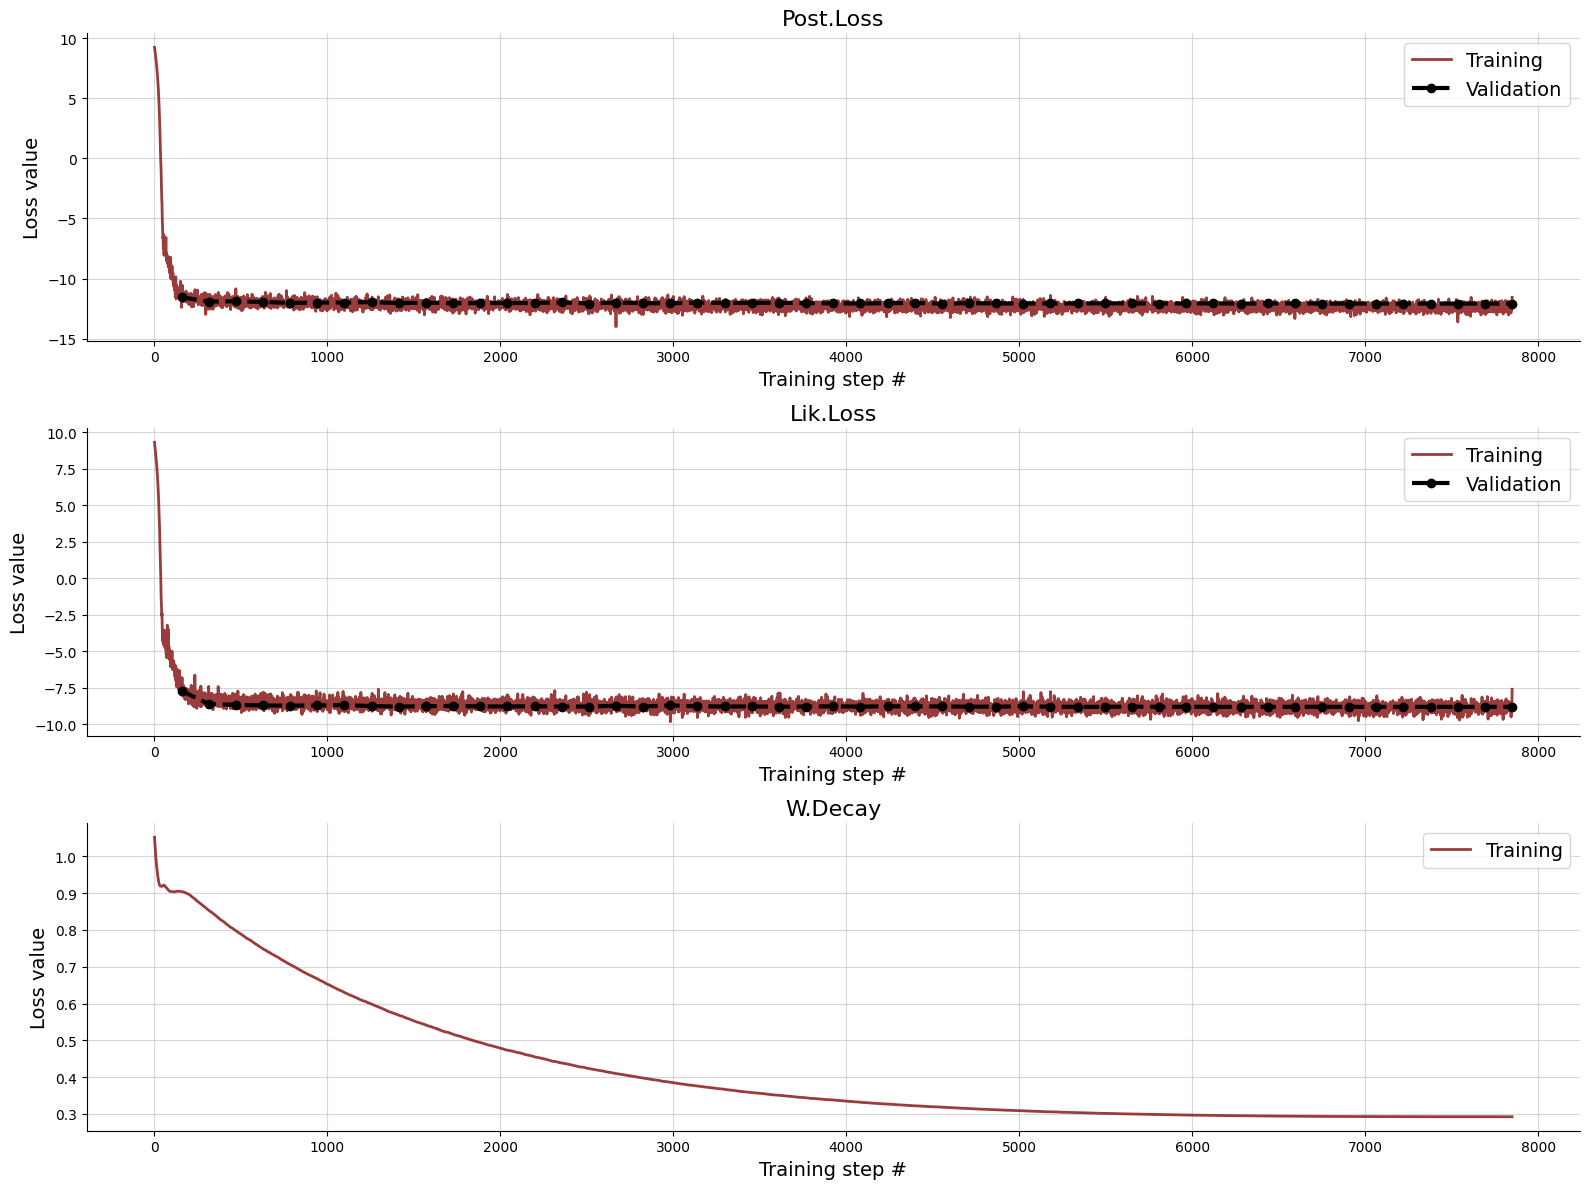

In [10]:
# Use loaded history, since reference 'h' will only exist after training
h = trainer.loss_history.get_plottable()
f = plot_losses(h['train_losses'], h['val_losses'])

## Test (Held-Out) Data

In [11]:
# Load test data
with open(f'test_data/{benchmark_name}_test.pkl', 'rb') as f:
    test_dict = pickle.load(f)

In [12]:
# Simulate from surrogate simulator
x_sim_s = amortizer.sample_data(test_dict, n_samples=1)
x_sim_s = tf.squeeze(x_sim_s)

# Sample from posteriors given surrogate outputs
post_samples_s = amortizer.sample_parameters({'direct_conditions': x_sim_s}, n_samples=250)

# Sample from posteriors given simulator outputs
post_samples = amortizer.sample_parameters(test_dict, n_samples=250)

# Prior samples
prior_samples = test_dict['posterior_inputs']['parameters']

### Calibration

#### Individual ECDF Plots

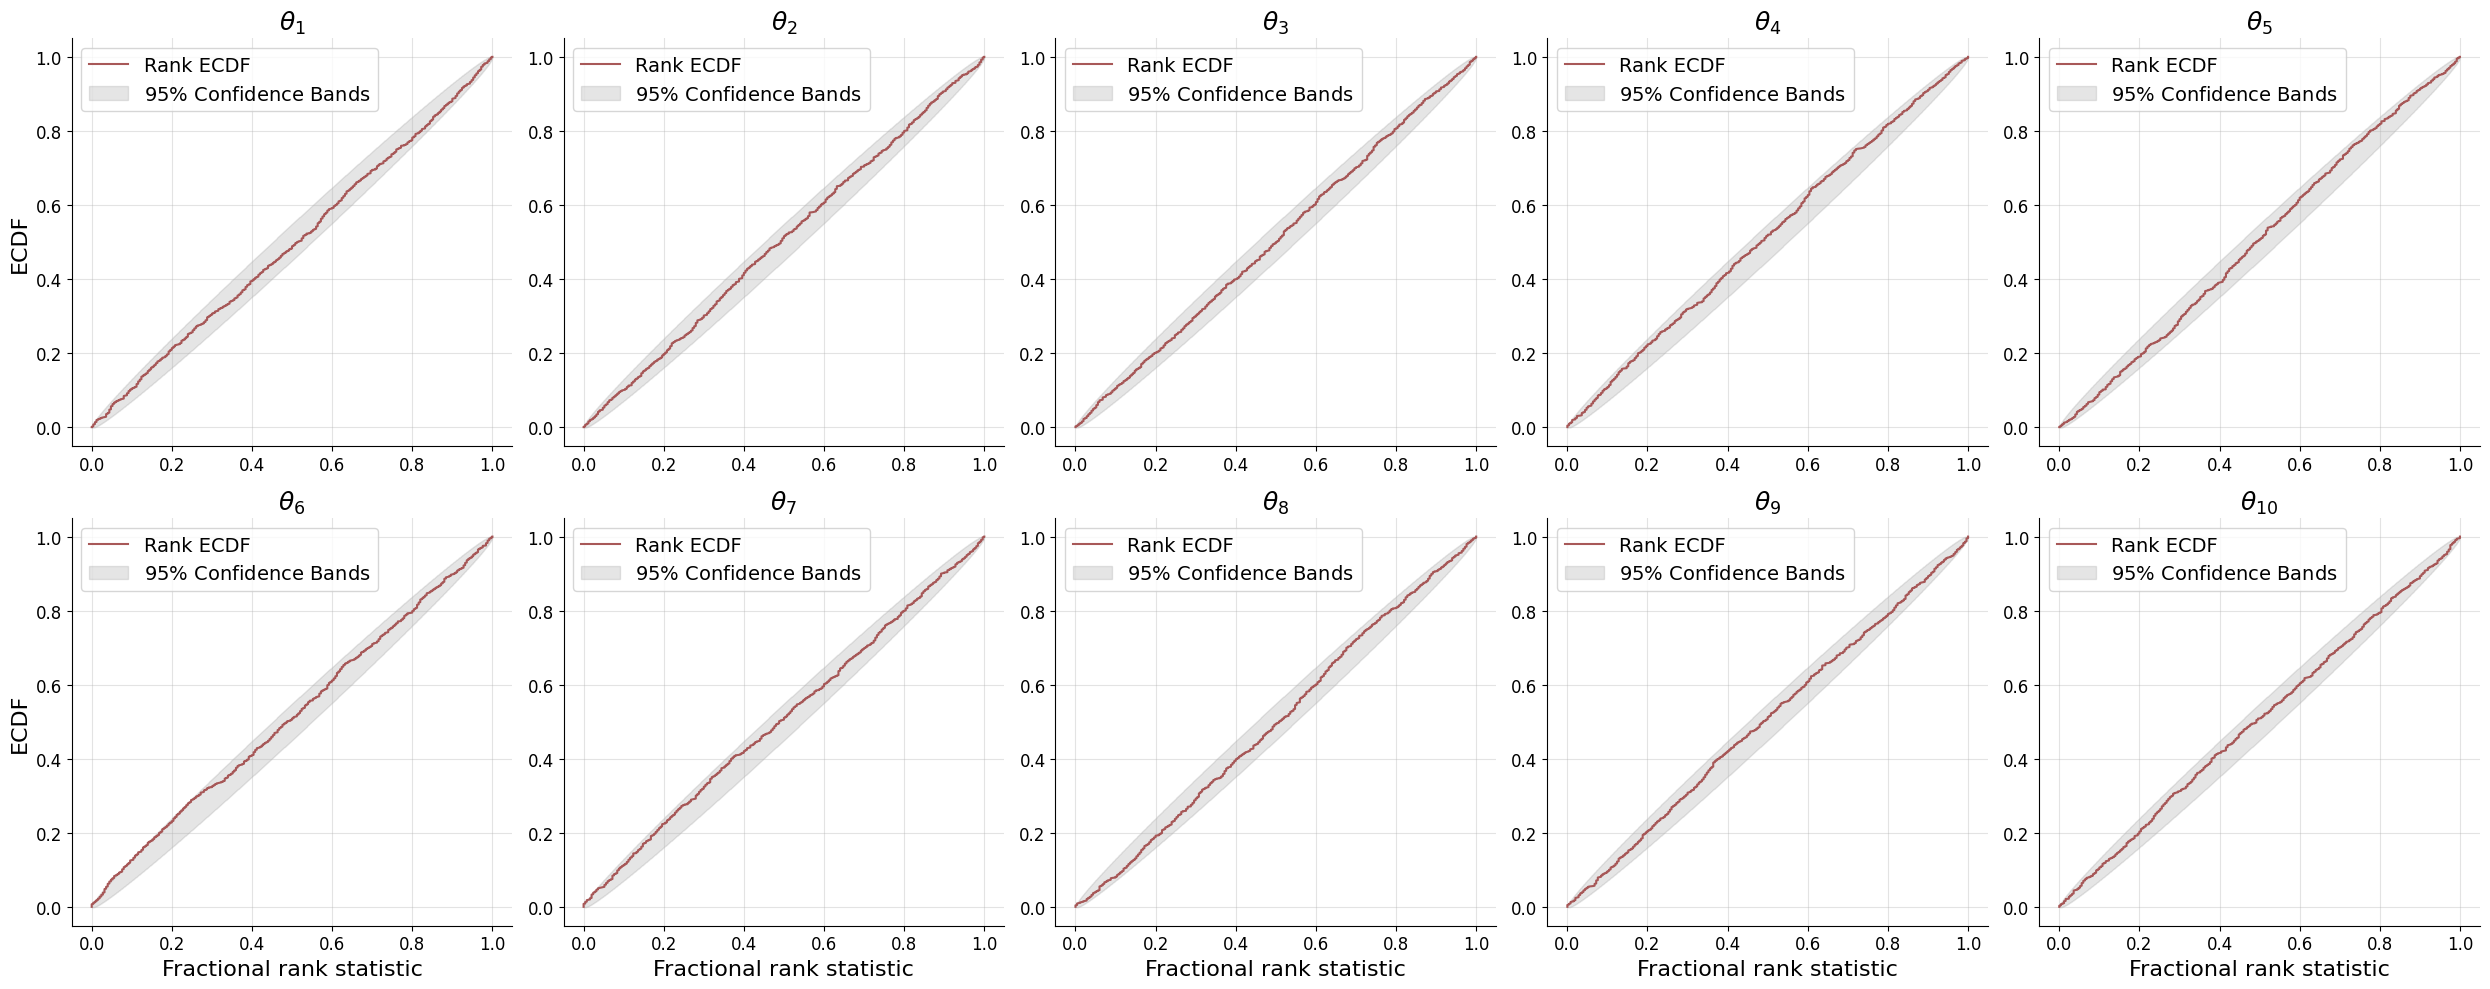

In [15]:
f = plot_sbc_ecdf(post_samples_s, prior_samples, ecdf_bands_kwargs=dict(confidence=0.95))

#### Recovery

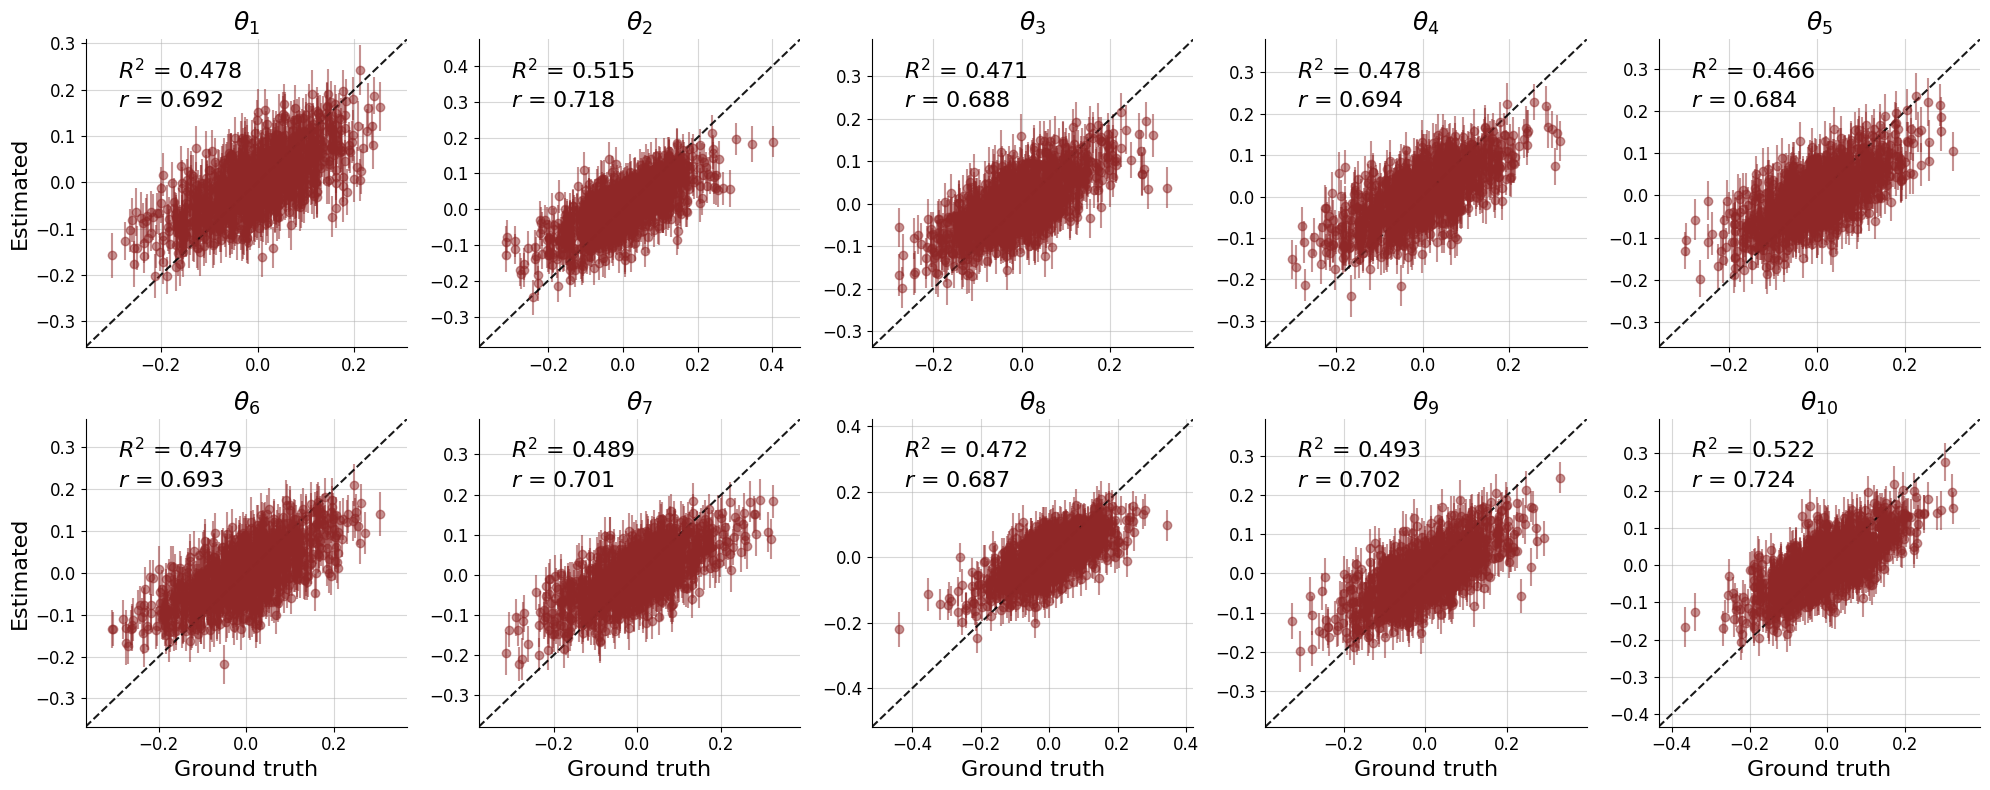

In [16]:
f = plot_recovery(post_samples, prior_samples)

# Appendix Plots

In [17]:
# load custom tighter plotting function
from custom_plots import plot_sbc_ecdf_appendix

# adjust for better readability
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    'text.latex.preamble' : r'\usepackage{{amsmath}}'
})

### Loss History

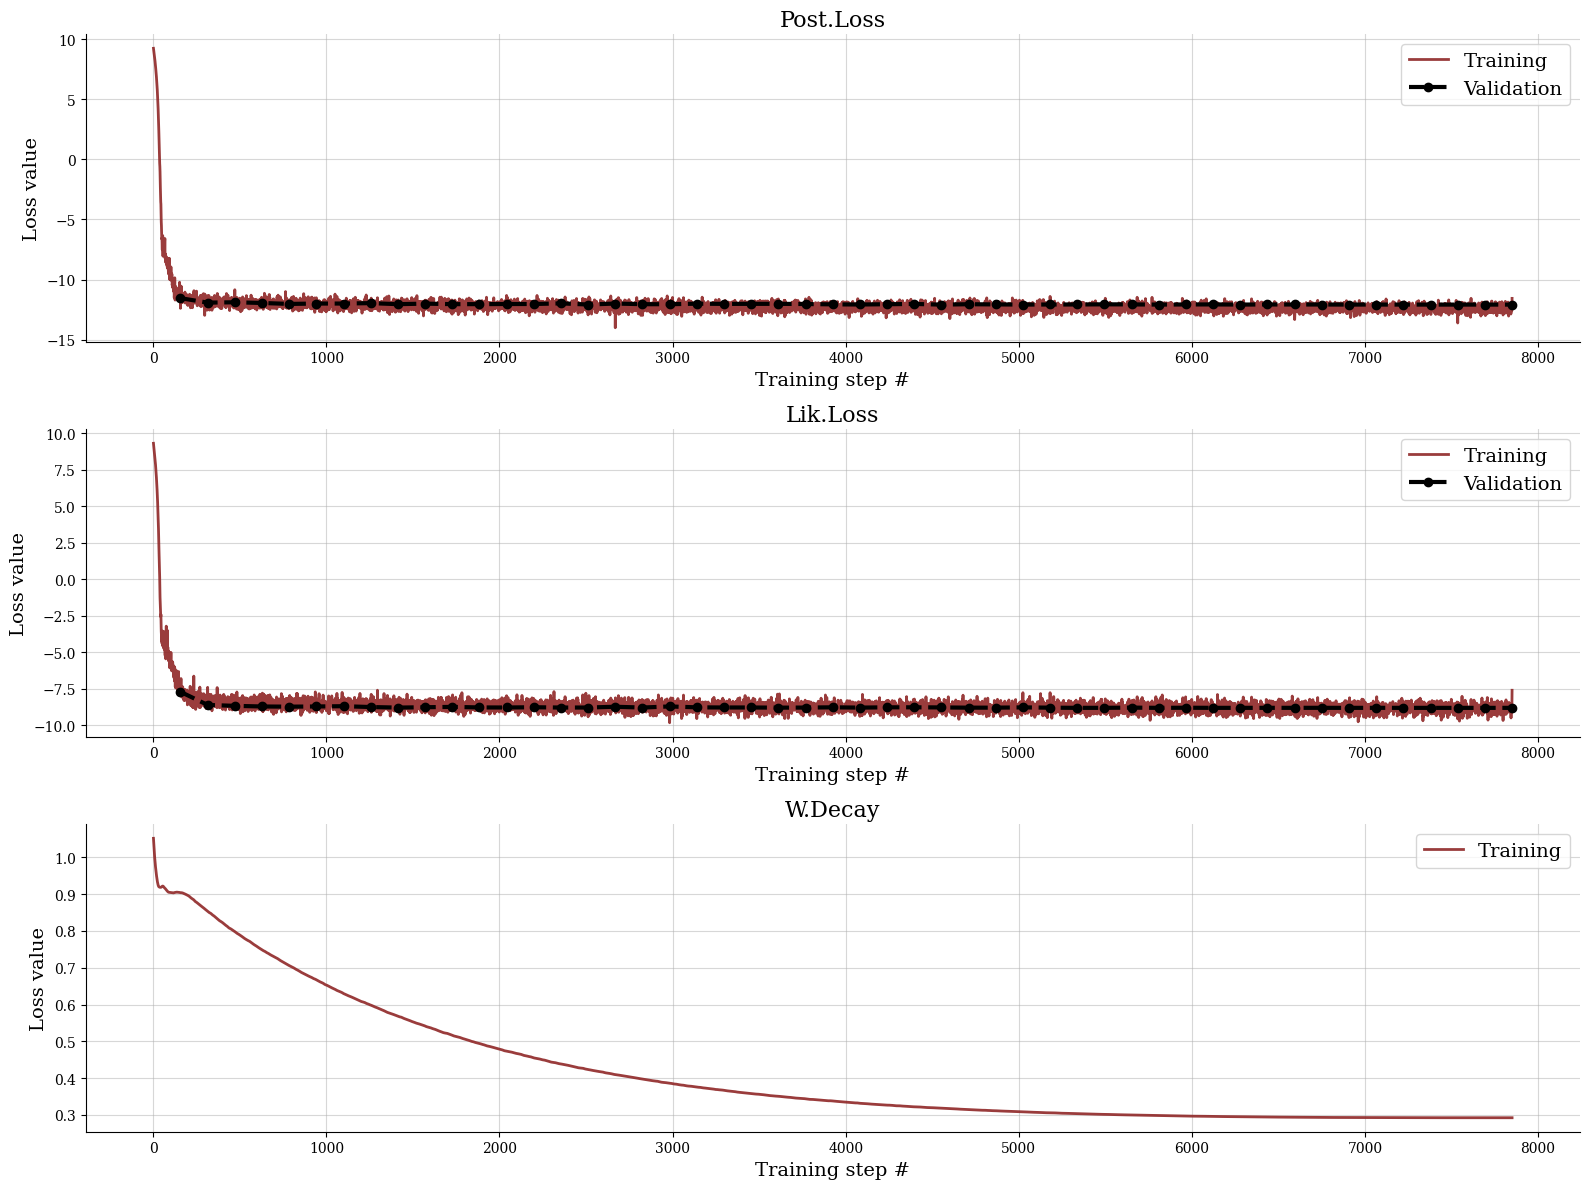

In [18]:
# Use loaded history, since reference 'h' will only exist after training
h = trainer.loss_history.get_plottable()
f = plot_losses(h['train_losses'], h['val_losses'])
plt.savefig(f"figures/{benchmark_name}_losses.pdf", dpi=300, bbox_inches="tight")

### Posterior Calibration

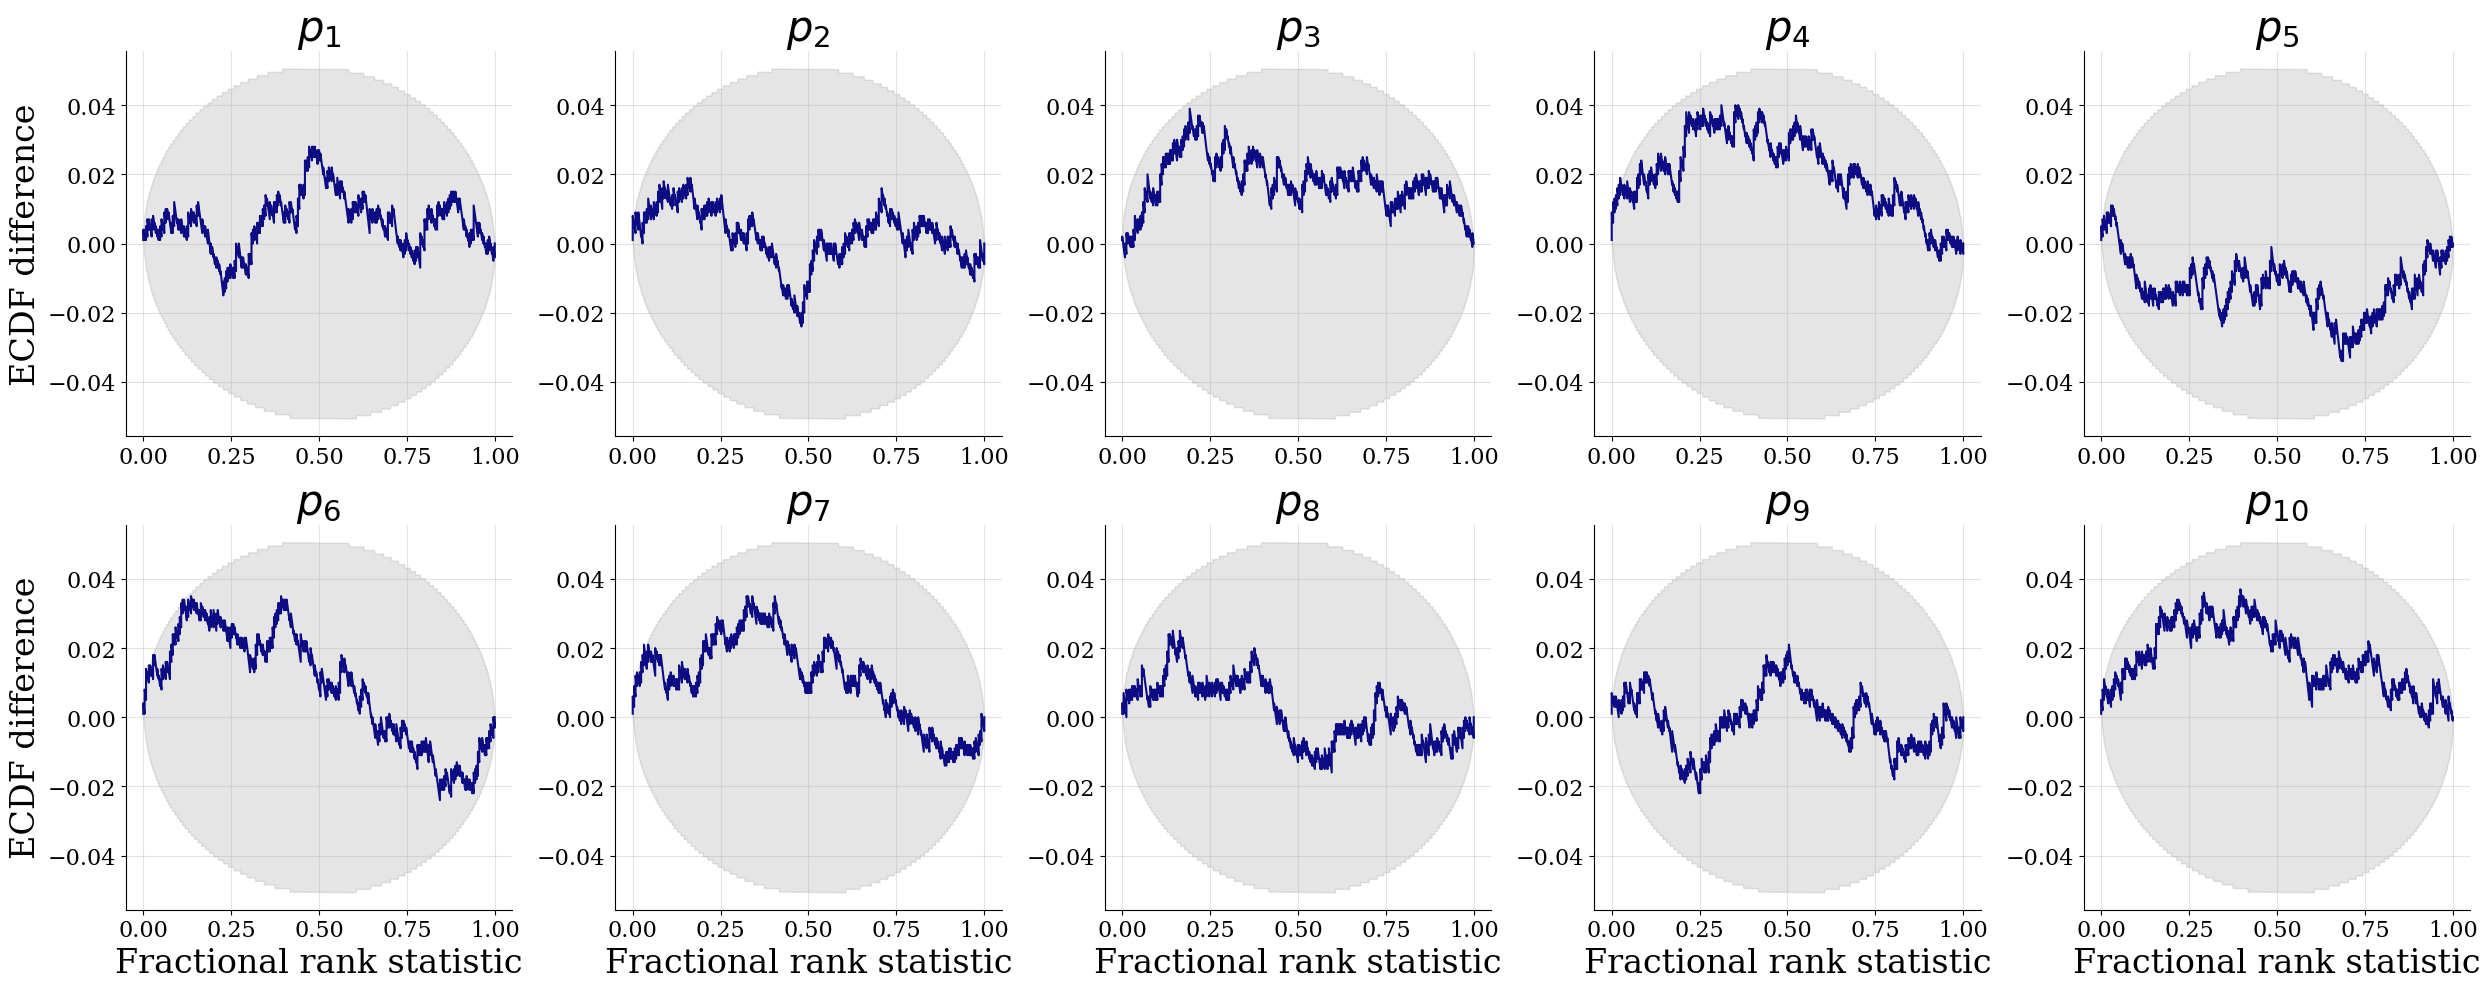

In [19]:
f = plot_sbc_ecdf_appendix(post_samples, prior_samples, ecdf_bands_kwargs=dict(confidence=0.95), 
                           param_names = benchmark.benchmark_info['parameter_names'],
                           label_fontsize=24, legend_fontsize=24, difference=True, rank_ecdf_color = '#000080' )
plt.savefig(f"figures/{benchmark_name}_posterior_calibration_diff_separate.pdf", dpi = 300, bbox_inches = "tight")

### Joint Calibration

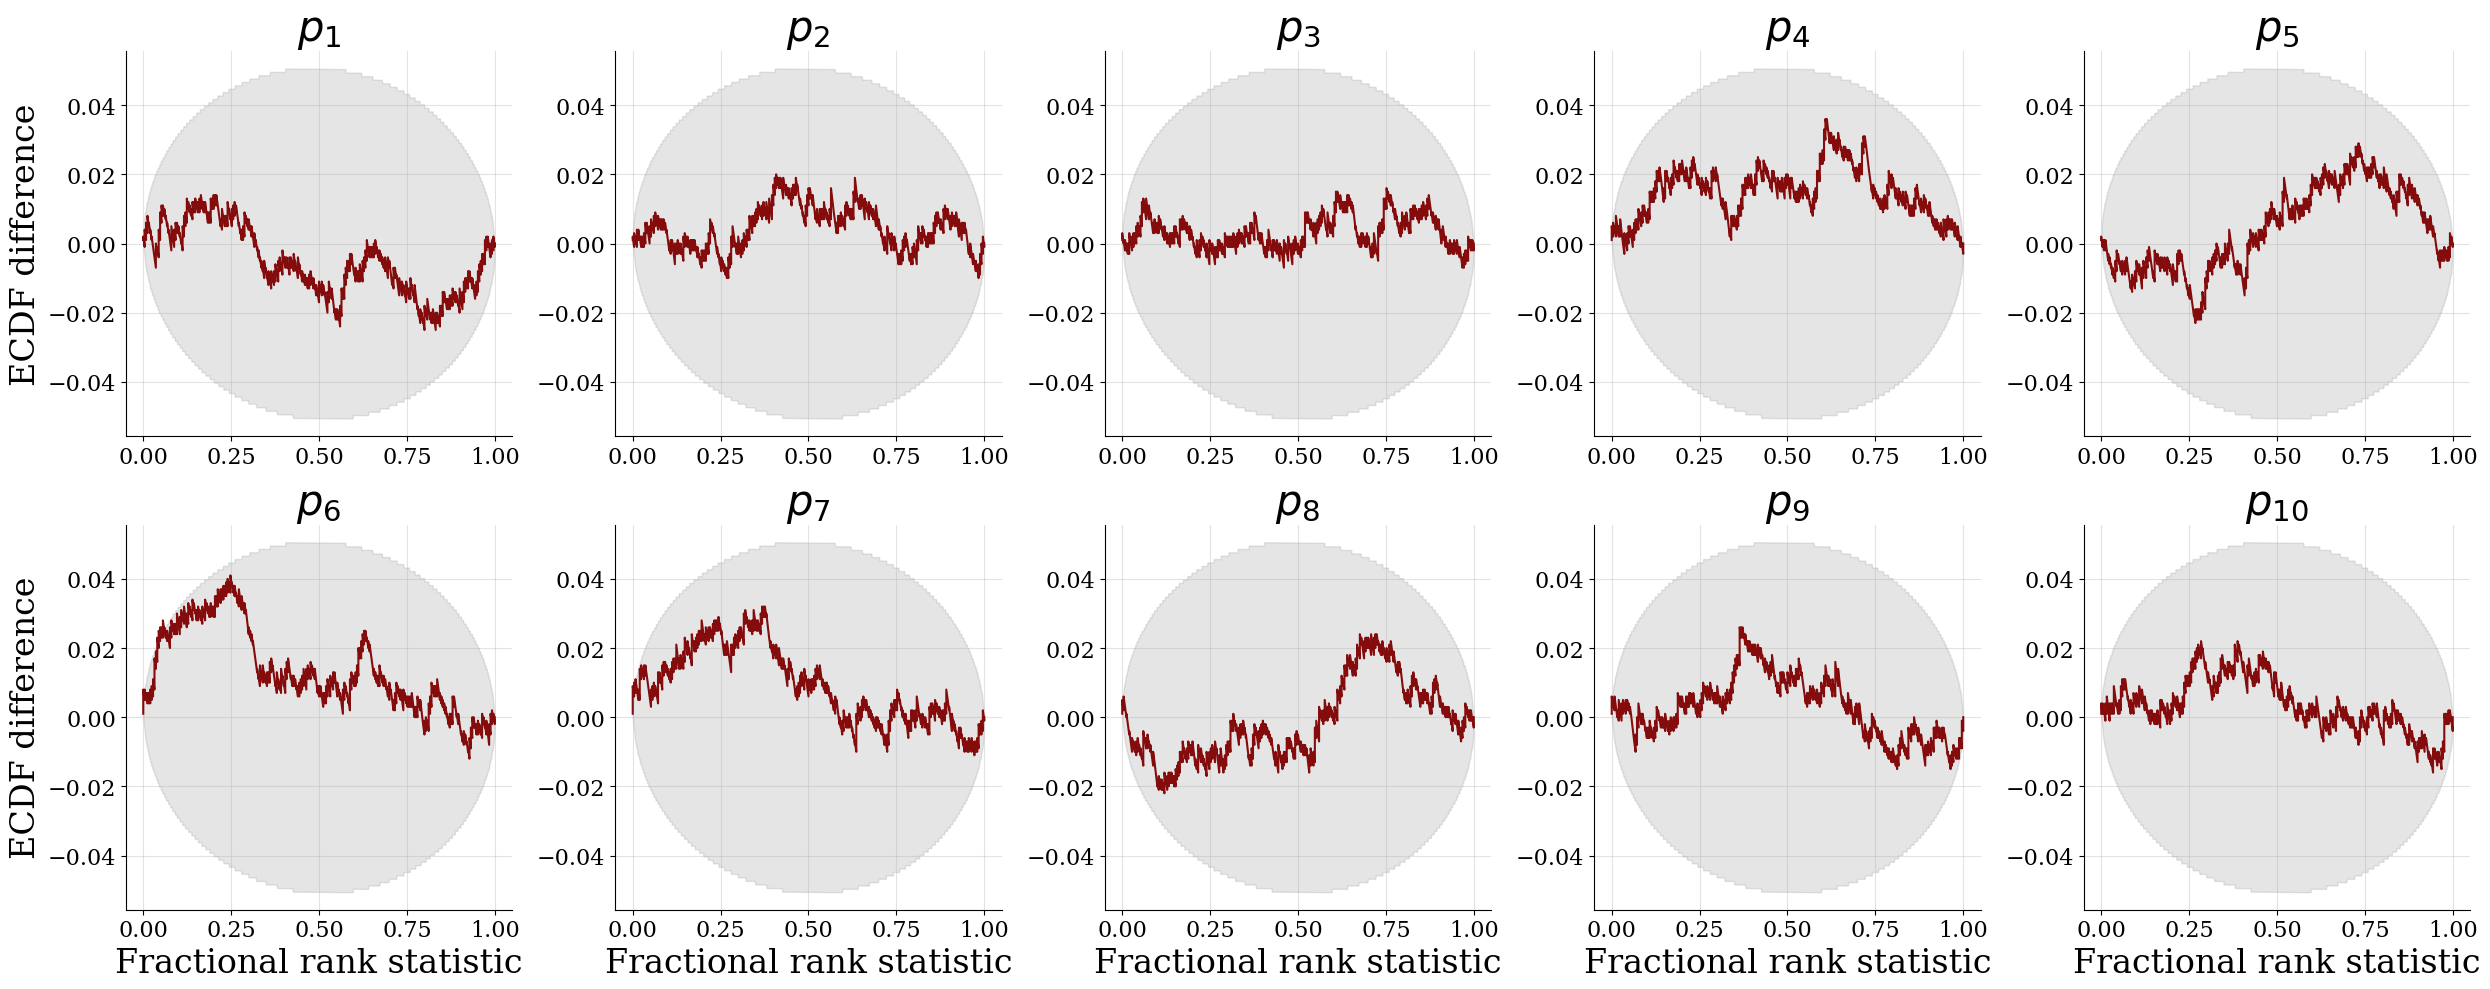

In [20]:
f = plot_sbc_ecdf_appendix(post_samples_s, prior_samples, ecdf_bands_kwargs=dict(confidence=0.95), 
                           param_names = benchmark.benchmark_info['parameter_names'],
                           label_fontsize=24, legend_fontsize=24, difference=True, rank_ecdf_color = '#800000')
plt.savefig(f"figures/{benchmark_name}_joint_calibration_diff_separate.pdf", dpi = 300, bbox_inches = "tight")